# Checking if environment is setup ok

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

envCV


In [3]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
!conda list

# packages in environment at C:\Users\smk61\miniconda3\envs\envCV:
#
# Name                    Version                   Build  Channel
argon2-cffi               21.1.0                   pypi_0    pypi
attrs                     21.2.0                   pypi_0    pypi
backcall                  0.2.0                    pypi_0    pypi
blas                      1.0                         mkl  
bleach                    4.1.0                    pypi_0    pypi
bottleneck                1.3.2            py39h7cc1a96_1  
brotli                    1.0.9                ha925a31_2  
ca-certificates           2021.7.5             haa95532_1  
certifi                   2021.5.30        py39haa95532_0  
cffi                      1.14.6                   pypi_0    pypi
colorama                  0.4.4                    pypi_0    pypi
cycler                    0.10.0           py39haa95532_0  
debugpy                   1.4.1                    pypi_0    pypi
decorator                 5.0.9           

# Importing and checks

In [5]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import time
import json
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from collections import OrderedDict
import torch
from torch import nn, optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torchvision import datasets, models, transforms
#assert torch.__version__ == "0.4.0"

# import helper
# import os

In [6]:
print(torch.__version__)
print(torch.cuda.is_available())

1.9.0+cu111
True


In [7]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 8EB6-9204

 Directory of D:\Prog\JobApp_HellosAI

07-09-2021  15:55    <DIR>          .
07-09-2021  15:55    <DIR>          ..
07-09-2021  14:03    <DIR>          .ipynb_checkpoints
06-09-2021  18:35    <DIR>          AI_Basic_Test
06-09-2021  18:21            10,284 AI_Basic_Test.zip
06-09-2021  22:18       241,695,533 classifier_Resnet152_1_0.pth
07-09-2021  13:27       196,843,831 classifier_Resnet50_1_15-5.pth
06-09-2021  18:34    <DIR>          Dataset
06-09-2021  18:22       470,359,528 Dataset.zip
07-09-2021  15:55            80,236 HellosAI_Asssignment.ipynb
06-09-2021  21:07             2,813 helper.py
07-09-2021  15:51           336,259 Image Transform and Predict.ipynb
06-09-2021  21:08    <DIR>          __pycache__
               7 File(s)    909,328,484 bytes
               6 Dir(s)  297,813,753,856 bytes free


# Path Setting and Label Map creation

In [8]:
data_dir = 'Dataset'
train_dir = data_dir + '/Training'
valid_dir = data_dir + '/Validation'

test_dir = data_dir + '/Testing'

dirs = {'train': train_dir, 
        'valid': valid_dir,
        'test': test_dir}

In [9]:
#classes are: ['Bicycle', 'Boat', 'Cat', 'Motorbike', 'People', 'Table']

label_map={"0":'Bicycle',
          "1":'Boat',
          "2":'Cat',
          "3":'Motorbike',
          "4":'People',
          "5":'Table',
          }

# Preprocessing Definations

In [10]:
# TODO: Define your transforms for the training and validation sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(45),
        transforms.Resize(256),
        transforms.RandomHorizontalFlip(.5),
        transforms.RandomVerticalFlip(.5),
        transforms.CenterCrop(224),
        transforms.ColorJitter(brightness=0.2, hue=.1, saturation=.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], 
                             [0.229, 0.224, 0.225])
    ]),    
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], 
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], 
                             [0.229, 0.224, 0.225])
    ]),
    
}

# TODO: Load the datasets with ImageFolder
image_datasets = {x: datasets.ImageFolder(dirs[x],   transform=data_transforms[x]) for x in ['train', 'valid']}
# TODO: Using the image datasets and the trainforms, define the dataloaders
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32, shuffle=True) for x in ['train', 'valid']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

In [11]:
print(dataset_sizes)

{'train': 1440, 'valid': 480}


In [12]:
class_names

['Bicycle', 'Boat', 'Cat', 'Motorbike', 'People', 'Table']

# Checking some things

In [ ]:
# train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
# test_data = datasets.ImageFolder(valid_dir, transform=data_transforms['valid'])

# trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
# testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [ ]:
# model = models.densenet121(pretrained=True)
# model

In [ ]:
# Freeze parameters so we don't backprop through them
# for param in model.parameters():
#     param.requires_grad = False

# from collections import OrderedDict
# classifier = nn.Sequential(OrderedDict([
#                           ('fc1', nn.Linear(1024, 500)),
#                           ('relu', nn.ReLU()),
#                           ('fc2', nn.Linear(500, 6)),
#                           ('output', nn.LogSoftmax(dim=1))
#                           ]))
    
# model.classifier = classifier

In [ ]:
# import time

In [ ]:
# for device in ['cpu', 'cuda']:
#     #device='cuda'

#     criterion = nn.NLLLoss()
#     # Only train the classifier parameters, feature parameters are frozen
#     optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

#     model.to(device)

#     for ii, (inputs, labels) in enumerate(trainloader):

#         # Move input and label tensors to the GPU
#         inputs, labels = inputs.to(device), labels.to(device)

#         start = time.time()

#         outputs = model.forward(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         if ii==3:
#             break
        
#     print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")

## Densenet Model

In [ ]:
# # Use GPU if it's available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = models.densenet121(pretrained=True)

# # Freeze parameters so we don't backprop through them
# for param in model.parameters():
#     param.requires_grad = False
    
# model.classifier = nn.Sequential(nn.Linear(1024, 256),
#                                  nn.ReLU(),
#                                  nn.Dropout(0.2),
#                                  nn.Linear(256, 6),
#                                  nn.LogSoftmax(dim=1))

# criterion = nn.NLLLoss()

# # Only train the classifier parameters, feature parameters are frozen
# optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

# model.to(device);

## Resnet Model

In [ ]:
# # Use GPU if it's available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = models.resnet50(pretrained=True)

# # Freeze parameters so we don't backprop through them
# #Turning off gradients
# for param in model.parameters():
#     param.requires_grad = False
    
# classifier=nn.Sequential(nn.Linear(2048, 512),
#                         nn.ReLU(),
#                         nn.Dropout(p=0.2),
#                         nn.Linear(512,6),
#                         nn.LogSoftmax(dim=1))
# model.fc=classifier

# criterion=nn.NLLLoss()
# optimizer=optim.Adam(model.fc.parameters(),lr=0.003)

# model.to(device)

## Training the model

In [ ]:
# epochs = 1
# steps = 0
# running_loss = 0
# print_every = 5
# for epoch in range(epochs):
#     for inputs, labels in trainloader:
#         steps += 1
#         # Move input and label tensors to the default device
#         inputs, labels = inputs.to(device), labels.to(device)
        
#         optimizer.zero_grad()
        
#         logps = model.forward(inputs)
#         loss = criterion(logps, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
        
#         if steps % print_every == 0:
#             test_loss = 0
#             accuracy = 0
#             model.eval()
#             with torch.no_grad():
#                 for inputs, labels in testloader:
#                     inputs, labels = inputs.to(device), labels.to(device)
#                     logps = model.forward(inputs)
#                     batch_loss = criterion(logps, labels)
                    
#                     test_loss += batch_loss.item()
                    
#                     # Calculate accuracy
#                     ps = torch.exp(logps)
#                     top_p, top_class = ps.topk(1, dim=1)
#                     equals = top_class == labels.view(*top_class.shape)
#                     accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
#             print(f"Epoch {epoch+1}/{epochs}.. "
#                   f"Train loss: {running_loss/print_every:.3f}.. "
#                   f"Test loss: {test_loss/len(testloader):.3f}.. "
#                   f"Test accuracy: {accuracy/len(testloader):.3f}")
#             running_loss = 0
#             model.train()

In [13]:
def train_model(model, criteria, optimizer, scheduler, num_epochs=25, device='cuda',past_epoch=0):
    #params:
    #model: The model to be loaded
    #criteria: The criterion used for loss calculation
    #optimizer: The optimizer to be used
    #scheduler: The scheduler to be used
    #num_epochs: The number of epochs to be trained for
    #past_epoch: The number of epochs this model has already being trained
    #device: Which device to execute the model on
    #NOTE:: model must already be moved into that device
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_optim_wts = copy.deepcopy(optimizer.state_dict())
    best_acc = 0.0
    best_ep = 1
    print('Epochs Trained So Far:',past_epoch)
    
    for epoch in range(num_epochs):
        since1 = time.time()
        print('Epoch {}/{}'.format(epoch+1+past_epoch, num_epochs+past_epoch))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                best_optim_wts = copy.deepcopy(optimizer.state_dict())
                best_ep = epoch + past_epoch

        print('Epoch Time:',time.time()-since1)
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    print('At Epoch:',best_ep+1)

    # load best model weights
    model.load_state_dict(best_model_wts)
    optimizer.load_state_dict(best_optim_wts)
    return model

## Model Creation and Training

In [18]:
# TODO: Build and train your network
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


#RESNET 50
model = models.resnet50(pretrained=True)

# Freeze parameters so we don't backprop through them
#Turning off gradients
for param in model.parameters():
    param.requires_grad = False
    
classifier=nn.Sequential(nn.Linear(2048, 512),
                        nn.ReLU(),
                        nn.Dropout(p=0.2),
                        nn.Linear(512,6),
                        nn.LogSoftmax(dim=1))
model.fc=classifier


#RESNET 152

# #Building Network
# model = models.resnet152(pretrained=True)

# for param in model.parameters():
#     param.requires_grad = False

# classifier = nn.Sequential(OrderedDict([
#                           ('fc1', nn.Linear(2048, 500)),
#                           ('relu', nn.ReLU()),
#                           ('d1', nn.Dropout(p=0.2)),
#                           ('fc3', nn.Linear(500, 6)),
#                           ('output', nn.LogSoftmax(dim=1))
#                           ]))
    
# model.fc = classifier


#DENSENET 121
# model = models.densenet121(pretrained=True)

# # Freeze parameters so we don't backprop through them
# for param in model.parameters():
#     param.requires_grad = False
    
# model.classifier = nn.Sequential(nn.Linear(1024, 256),
#                                  nn.ReLU(),
#                                  nn.Dropout(0.2),
#                                  nn.Linear(256, 6),
#                                  nn.LogSoftmax(dim=1))




criterion = nn.NLLLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.01, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)
model.to(device);

# number of epochs to train the model
n_epochs = 15
epochs_trained=0

model = train_model(model, criterion, optimizer, scheduler, n_epochs, device)

Epochs Trained So Far: 0
Epoch 1/50
----------
train Loss: 1.6001 Acc: 0.3563
valid Loss: 1.1550 Acc: 0.5500
Epoch Time: 65.20500874519348

Epoch 2/50
----------
train Loss: 1.2352 Acc: 0.5431
valid Loss: 0.9429 Acc: 0.6479
Epoch Time: 65.37499928474426

Epoch 3/50
----------
train Loss: 1.1369 Acc: 0.5875
valid Loss: 0.8298 Acc: 0.7292
Epoch Time: 65.03799176216125

Epoch 4/50
----------
train Loss: 1.0118 Acc: 0.6340
valid Loss: 0.7890 Acc: 0.7458
Epoch Time: 64.85700678825378

Epoch 5/50
----------
train Loss: 0.9616 Acc: 0.6542
valid Loss: 0.7720 Acc: 0.7542
Epoch Time: 64.33695912361145

Epoch 6/50
----------
train Loss: 0.9528 Acc: 0.6479
valid Loss: 0.7916 Acc: 0.7104
Epoch Time: 65.70603322982788

Epoch 7/50
----------
train Loss: 0.9195 Acc: 0.6576
valid Loss: 0.7396 Acc: 0.7417
Epoch Time: 69.67304039001465

Epoch 8/50
----------
train Loss: 0.9487 Acc: 0.6535
valid Loss: 0.7481 Acc: 0.7458
Epoch Time: 66.58568954467773

Epoch 9/50
----------
train Loss: 0.8930 Acc: 0.6653
va

In [ ]:
#Subsequent Training
n_epochs = 10
epochs_trained = 50
model = train_model(model, criterion, optimizer, scheduler, n_epochs, device,epochs_trained)

In [20]:
#Training after freeing

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for param in model.parameters():
    param.requires_grad = True
    
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1)
model.to(device)

n_epochs = 30
epochs_trained = 20
model = train_model(model, criterion, optimizer, scheduler, n_epochs, device,epochs_trained)

Epochs Trained So Far: 20
Epoch 21/50
----------


C:\Users\smk61\miniconda3\envs\envCV\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train Loss: 0.6243 Acc: 0.7799
valid Loss: 0.6372 Acc: 0.8000
Epoch Time: 69.76796984672546

Epoch 22/50
----------
train Loss: 0.4979 Acc: 0.8264
valid Loss: 0.6278 Acc: 0.7979
Epoch Time: 67.5129976272583

Epoch 23/50
----------
train Loss: 0.4521 Acc: 0.8493
valid Loss: 0.6372 Acc: 0.7958
Epoch Time: 66.89399886131287

Epoch 24/50
----------
train Loss: 0.4090 Acc: 0.8590
valid Loss: 0.6464 Acc: 0.7937
Epoch Time: 66.64800477027893

Epoch 25/50
----------
train Loss: 0.3533 Acc: 0.8750
valid Loss: 0.6079 Acc: 0.8063
Epoch Time: 67.83999681472778

Epoch 26/50
----------
train Loss: 0.2855 Acc: 0.9021
valid Loss: 0.6912 Acc: 0.8021
Epoch Time: 73.2755241394043

Epoch 27/50
----------
train Loss: 0.2954 Acc: 0.9028
valid Loss: 0.7345 Acc: 0.7646
Epoch Time: 74.023996591568

Epoch 28/50
----------
train Loss: 0.2460 Acc: 0.9243
valid Loss: 0.6536 Acc: 0.7979
Epoch Time: 72.17500138282776

Epoch 29/50
----------
train Loss: 0.2193 Acc: 0.9375
valid Loss: 0.6573 Acc: 0.8083
Epoch Time: 70

In [21]:
#Saving the model

arch="resnet50"

#ver=2 for without unfreezing
#ver=1 for after unfreezing
ver = "1"


model.class_to_idx = image_datasets['train'].class_to_idx
model.cpu()
torch.save({'arch': arch,
            'ver': ver ,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'epoch':n_epochs+epochs_trained,
            'class_to_idx': model.class_to_idx}, 
            'classifier_Resnet50_1_15-55.pth')

### Findings
All models tested with 50+5 epochs to understand best fit model
Resnet 50::
Training complete in 46m 17s
Best val Acc: 0.766667
At Epoch: 13
Training complete in 5m 35s
Best val Acc: 0.802083
At Epoch: 17

Resnet 152::
Free model didn't fit in my GPU memory :(. CPU would take too much time.

# Loading the model

In [14]:
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_model(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    
    if checkpoint['arch'] == 'resnet152':
        model = models.resnet152(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        # Create the classifier
        classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2048, 500)),
                          ('relu', nn.ReLU()),
                          ('d1', nn.Dropout(p=0.2)),
                          ('fc3', nn.Linear(500, 6)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
        # Put the classifier on the pretrained network
        model.fc = classifier
    elif checkpoint['arch'] == 'resnet50':
        model = models.resnet50(pretrained=True)

        # Freeze parameters so we don't backprop through them
        #Turning off gradients
        for param in model.parameters():
            param.requires_grad = False

        classifier=nn.Sequential(nn.Linear(2048, 512),
                                nn.ReLU(),
                                nn.Dropout(p=0.2),
                                nn.Linear(512,6),
                                nn.LogSoftmax(dim=1))
        model.fc=classifier
    else:
        print("Sorry base architecture not recognized")
        #break 
    
    model.class_to_idx = checkpoint['class_to_idx']
    
    
    if checkpoint['ver'] == '1':#i.e after unfreezing
        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    elif checkpoint['ver'] == '2':#i.e without unfreezing
        optimizer = optim.SGD(model.fc.parameters(), lr=0.01, momentum=0.9)
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    #FOR CPU as in the Udacity Servers
    #device = torch.device('cpu')
    #model.load_state_dict(checkpoint['model_state_dict'],strict="False",map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'],strict="False")
    
    return model

In [15]:
model=load_model('classifier_Resnet50_1_15-5.pth')

In [16]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Showing the image

In [22]:
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model
    img = Image.open(image_path).convert('RGB')
    # Resize
    if img.size[0] > img.size[1]:
        img.thumbnail((10000, 256))
    else:
        img.thumbnail((256, 10000))
    # Crop 
    left_margin = (img.width-224)/2
    bottom_margin = (img.height-224)/2
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224
    img = img.crop((left_margin, bottom_margin, right_margin,   
                      top_margin))
    # Normalize
    img = np.array(img)/255
    mean = np.array([0.485, 0.456, 0.406]) #provided mean
    std = np.array([0.229, 0.224, 0.225]) #provided std
    img = (img - mean)/std
    
    # Move color channels to first dimension as expected by PyTorch
    img = img.transpose((2, 0, 1))
    
    return img

In [23]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

<AxesSubplot:>

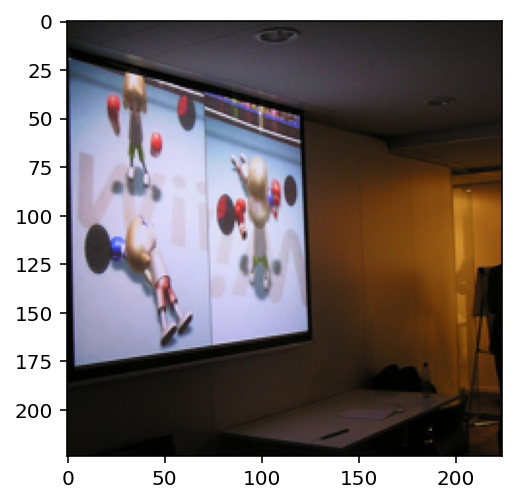

In [24]:
image_path = 'Dataset/Validation/Table/2015_07117.jpg'
img = process_image(image_path)
imshow(img)

# Code for prediction

In [25]:
def predict(image_path, model, top_num=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file
    # Process image
    img = process_image(image_path)
    
    # Numpy -> Tensor
    image_tensor = torch.from_numpy(img).type(torch.FloatTensor)
    # Add batch of size 1 to image
    model_input = image_tensor.unsqueeze(0)
    
    # Probs
    probs = torch.exp(model.forward(model_input))
    
    # Top probs
    top_probs, top_labs = probs.topk(top_num)
    top_probs = top_probs.detach().numpy().tolist()[0] 
    top_labs = top_labs.detach().numpy().tolist()[0]
    
#     print(top_probs, top_labs)
    
    # Convert indices to classes
    idx_to_class = {val: key for key, val in    
                                      model.class_to_idx.items()}
#     print(idx_to_class)
    top_labels = [idx_to_class[lab] for lab in top_labs]
#     print(top_labels)
    return top_probs, top_labels

In [36]:
# TODO: Display an image along with the top 5 classes
def plot_solution(image_path, model):
    # Set up plot
    plt.figure(figsize = (6,10))
    ax = plt.subplot(2,1,1)
    # Set up title
#     flower_num = image_path.split('/')[2]
    title_ = "Test Image"#label_map[flower_num]
    # Plot flower
    img = process_image(image_path)
    imshow(img, ax, title = title_);
    # Make prediction
    probs, labs = predict(image_path, model) 
    # Plot bar chart
    plt.subplot(2,1,2)
    sns.barplot(x=probs, y=labs, color=sns.color_palette()[0]);
    plt.show()

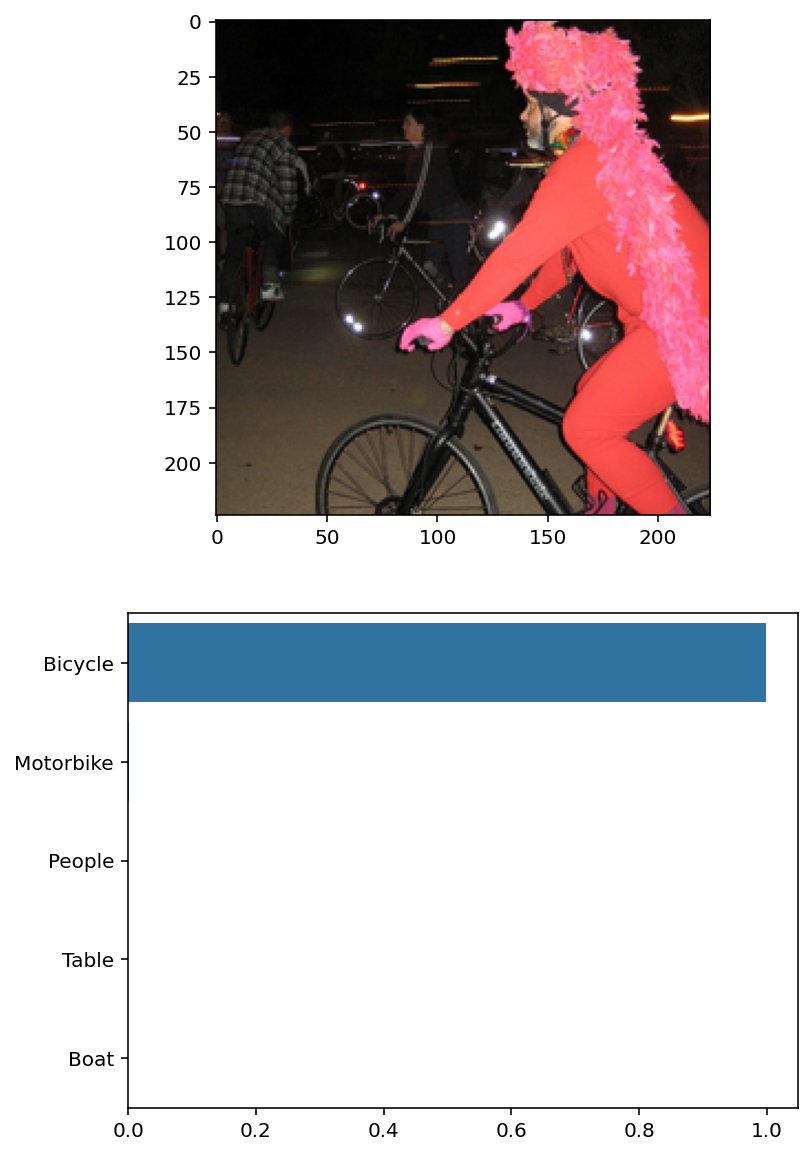

<module 'matplotlib.pyplot' from 'C:\\Users\\smk61\\miniconda3\\envs\\envCV\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [35]:
image_path = 'Dataset/Testing/2015_00440.JPEG'
model.to('cpu')
plot_solution(image_path, model)

# Predicting Test Images

In [29]:
import pandas as pd
df_test=pd.read_csv("AI_Basic_Test/test_set.csv")
df_test.head()

,Image_Path,Class
0,Testing/2015_00417.jpg,NaN
1,Testing/2015_07261.jpg,NaN
2,Testing/2015_01083.jpg,NaN
3,Testing/2015_06722.jpg,NaN
4,Testing/2015_01124.jpg,NaN


In [37]:
pred_list=[]
my_rows=zip(df_test['Image_Path'])

for i,(path,) in enumerate(my_rows):
    image_path = 'Dataset/'+path
    #print(path)
    _,pred_class=predict(image_path,model)
    pred_list.append(pred_class[0])

In [38]:
df_test['Class']=pred_list

In [39]:
df_test.head()

,Image_Path,Class
0,Testing/2015_00417.jpg,Bicycle
1,Testing/2015_07261.jpg,Table
2,Testing/2015_01083.jpg,Boat
3,Testing/2015_06722.jpg,People
4,Testing/2015_01124.jpg,Boat


In [42]:
df_test.to_csv("test.csv",index=False,header=["File_Path","Class"])

# Sanity Checking v2

In [ ]:
pred_list=[]
my_rows=zip(df_test['Image_Path'])

for i,(path,) in enumerate(my_rows):
    image_path = 'Dataset/'+path
    #print(path)
    plot_solution(image_path,model)